# <u>Distribution Plots.

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* histplot
* jointplot
* pairplot
* rugplot
* kdeplot

---

# <u>Imports.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- <u>NOTE:

    - And since I'm in the notebook, I'm going to go ahead and run %matplotlib inline, so that way I can see the visualizations inside the notebook.
    - Not necessary to run %matplotlib inline

---

# <u>Data to plot.

Seaborn comes with built-in data sets!

In [2]:
tips = sns.load_dataset('tips')

- <u>NOTE:

    - 'tips' is a dataset this is basically showing people who had a meal and then left a tip afterwards.
    - Saving it to an instance tips.

In [3]:
# .head(), shows first five rows by default.

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---

# 1) <u>histplot

- ***The histplot shows the distribution of a univariate set of observations.***

    "Univariate" simply means one variable.

    If we’re analyzing data and only looking at a single feature/column at a time (like height, age, or salary), that’s univariate analysis.

    👉 Example: Looking at just the distribution of ages in a dataset.

- ***Syntax:*** sns.histplot(indexed_col_name, kde = False, bins = 10)

                where;
                        indexed_col_name = indexed column from the DataFrame.
                        kde = kernel density estimation

Later on in this lecture we're going to discuss what kde is and how we can actually build that up.

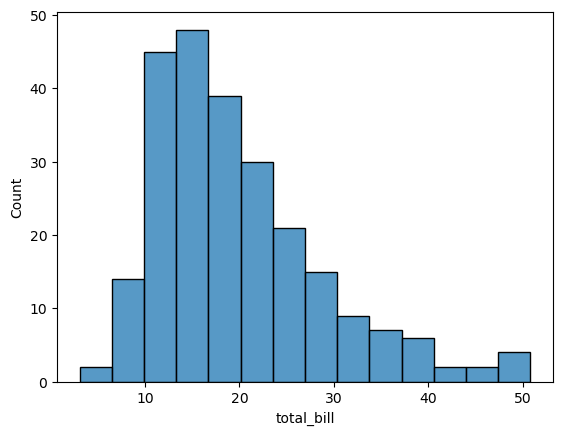

In [4]:
sns.histplot(tips['total_bill'])

plt.show()

***To add the kde layer to the histogram use:***

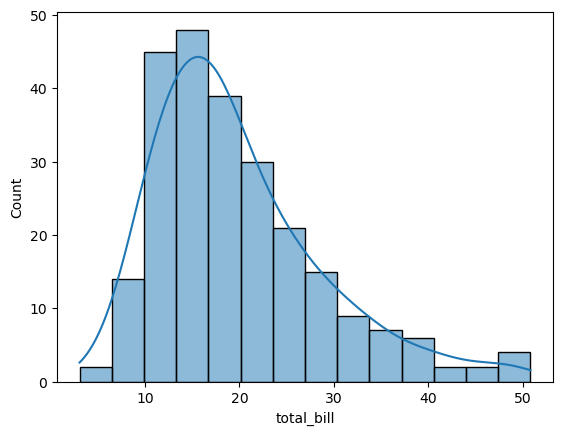

In [5]:
sns.histplot(tips['total_bill'], kde = True)

plt.show()

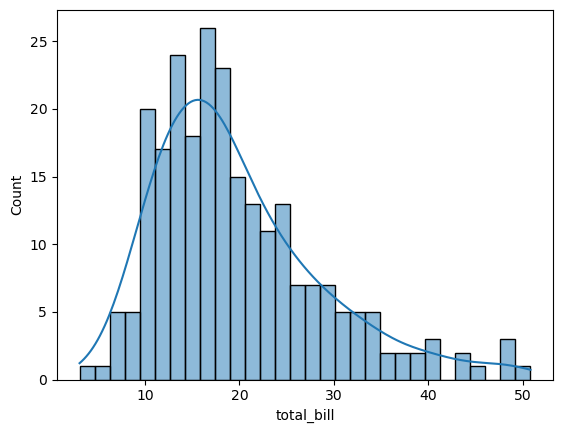

In [6]:
# With bins keyword argument.
# 30 equal width bin size(interval).
# bins value depends on data. 

sns.histplot(tips['total_bill'], kde = True, bins = 30)

plt.show()

In [7]:
tips['total_bill'].min()

3.07

In [8]:
tips['total_bill'].max()

50.81

- <u>NOTE:

    - We can see from the plot that most of the bills happen around 10 and 25.

If we choose a value that's too high for bins. For instance let's go ahead and put in 100 in bins, we'll start to get kind of a weird scenario where we're essentially beginning to plot every single instance of total bills for every single price point:

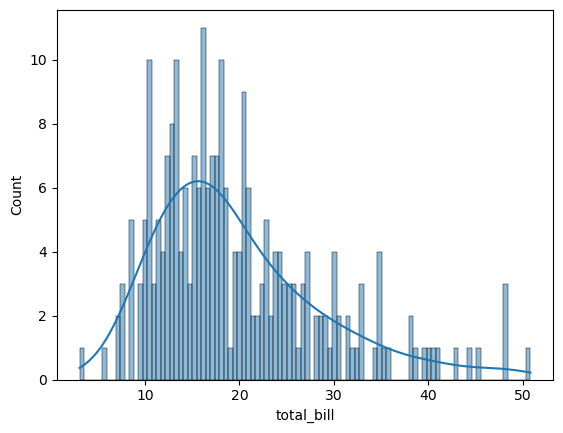

In [9]:
sns.histplot(tips['total_bill'], kde = True, bins = 100)

plt.show()

---

# 2) <u>jointplot

***jointplot() allows us to basically match up two histplots for bivariate data. With our choice of what <u>kind</u> parameter to compare with:*** 

("Bivariate" simply means two variables.)

* kind = 'scatter' 
* kind = 'hex'
* kind = 'reg' 
* kind = 'kde'
* kind = 'resid'

***Syntax: sns.jointplot(x = 'col_name1', y = 'col_name2', data = DataFrame, kind)***
                    
                    where;
                        col_name1 and col_name2 = column names in strings belonging to the DataFrame.

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Example: Compare the distribution of the total bill versus the tip size.

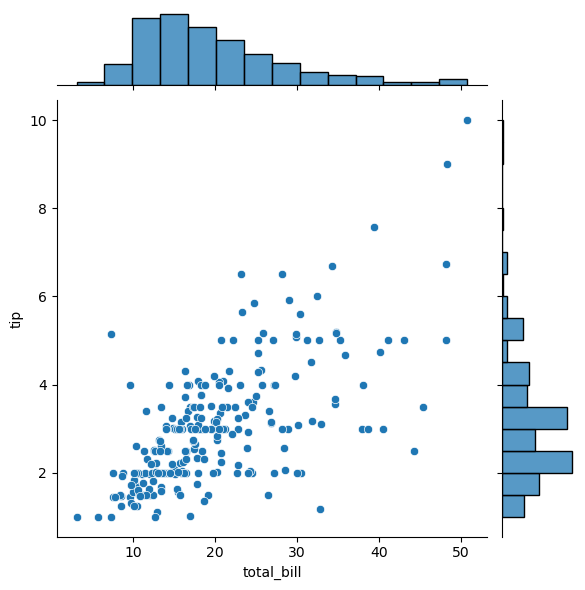

In [11]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips)

plt.show()

- <u>NOTE:

    - So we get a plot that looks like this.
    - We get two distribution plots / histograms(on top and right corners).
    - The top histogram shows distribution of total_bill column. It shows frequency of bill amounts in specified bins/intervals.
    - The right histogram shows distribution of tip column. It shows frequency of tip amounts in specified bins/intervals.
    - In the centre we get a scatter plot.
    - Scatter plot → shows relationship between actual total_bill and tip values.
    - In the scatter plot part of the jointplot, each point is just a coordinate (x, y) like (16.99, 1.01):

              x = one row’s total_bill value
              y = the same row’s tip value  
    - Looks like the scatter plot has a trend that as it goes higher in total bill it goes higher in tip and that makes sense because tips are usually proportionate to the total bill.

### kind parameter.

Now joint plots actually gives us an additional argument/parameter called kind and this kind parameter allows us to affect what's actually going on inside the joint plot.

By default kind = 'scatter', and it will be most used.

Meaning we will get a scatter distribution representation.

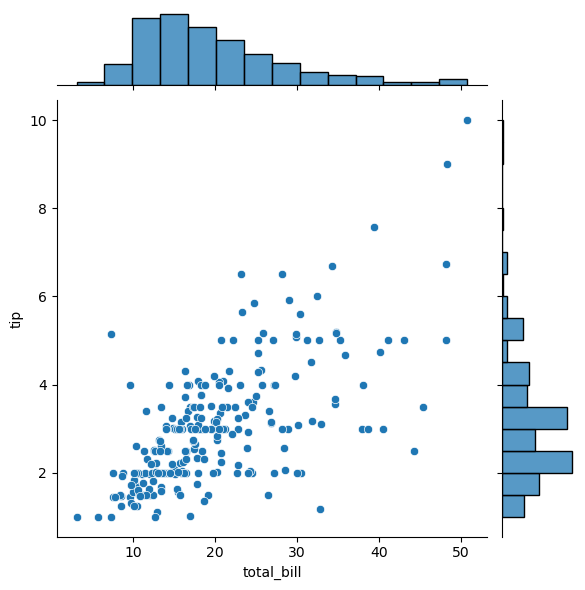

In [12]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'scatter')

plt.show()

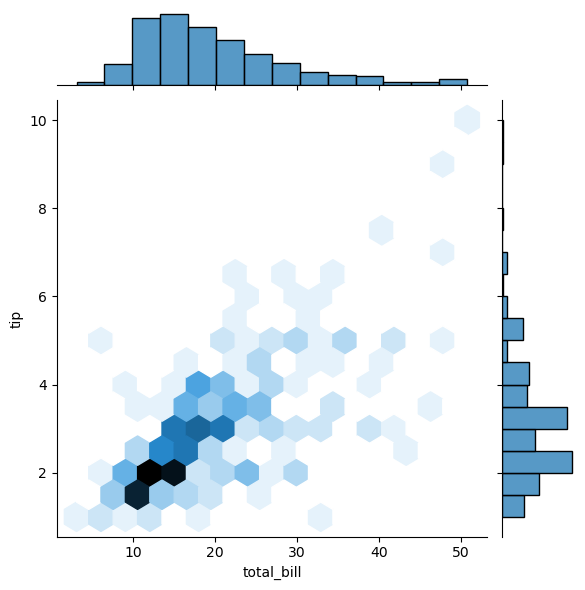

In [13]:
# hexagonal distribution representation.

sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'hex')

plt.show()

- <u>NOTE:

    - Darker hexagon represents more data points in that area.
    - Light hexagon represents less data points in that area.

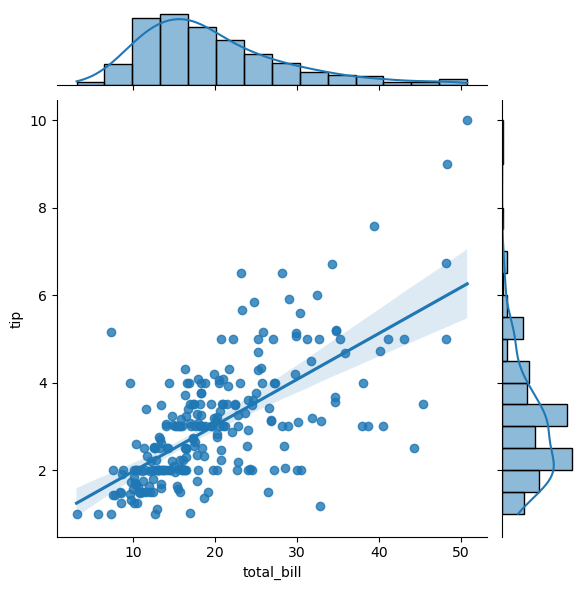

In [14]:
# regression distribution representation.

sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg')

plt.show()

- <u>NOTE:

    - And this will look a lot like a scatterplot except Seaborn is actually going to draw a regression line on it.
    - Now we haven't actually learnt about linear regression, it's a machine learning topic but later on when we do approach that topic will come back to this plot and actually discuss how this line is built.

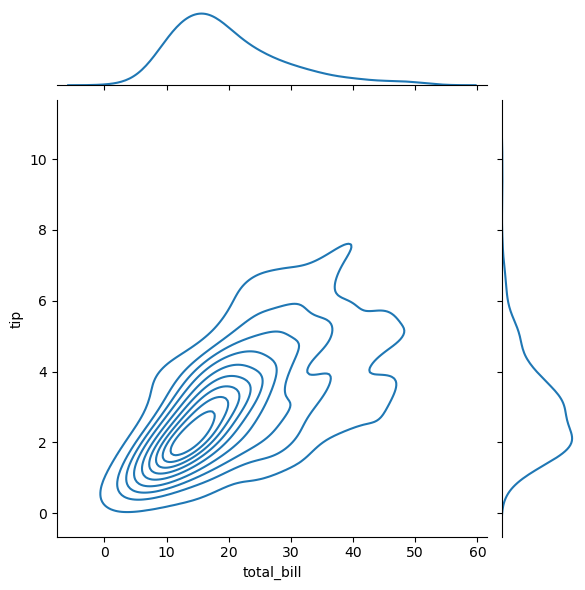

In [15]:
# kde(kernel density estimation) distribution representation.

sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'kde')

plt.show()

- <u>NOTE:

    - Essentially just shows us the density of where these data points match up the most.

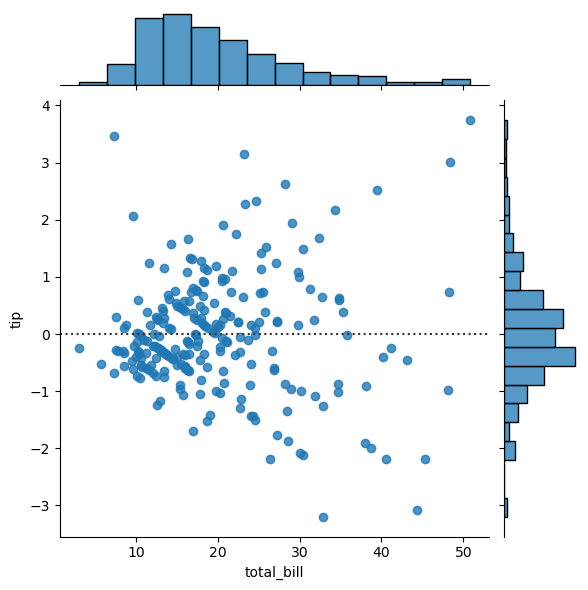

In [16]:
# residual distribution representation.
# Optional

sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'resid')

plt.show()

- <u>NOTE:

    - Residuals are the differences between observed values and the values predicted by a regression line.
    - In other words:
                      residual = actual y − predicted y

---

# 3) <u>pairplot

***pairplot will plot pairwise relationships across an entire DataFrame (for the numerical columns) and supports a color hue argument (for categorical columns).***

***Esentially does jointplot for every single possible combination of the numerical columns in the DataFrame.***

Keep in mind a pairplot will take larger space if the columns (possible combinations) are more.

color hue(hue argumnet) takes in a categorical column. And categorical dosen't mean numerical or contineous but actual categories.

For instance the sex column is categorical because there's two categories in it, male and female.

And when we pass hue equals some categorical column name, it will color the data points based on the category and we will get a legend.

***Syntax: sns.pairplot(DataFrame, hue = 'categorical_col_name', palette)***

                    where;
                        hue = categorical column name

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


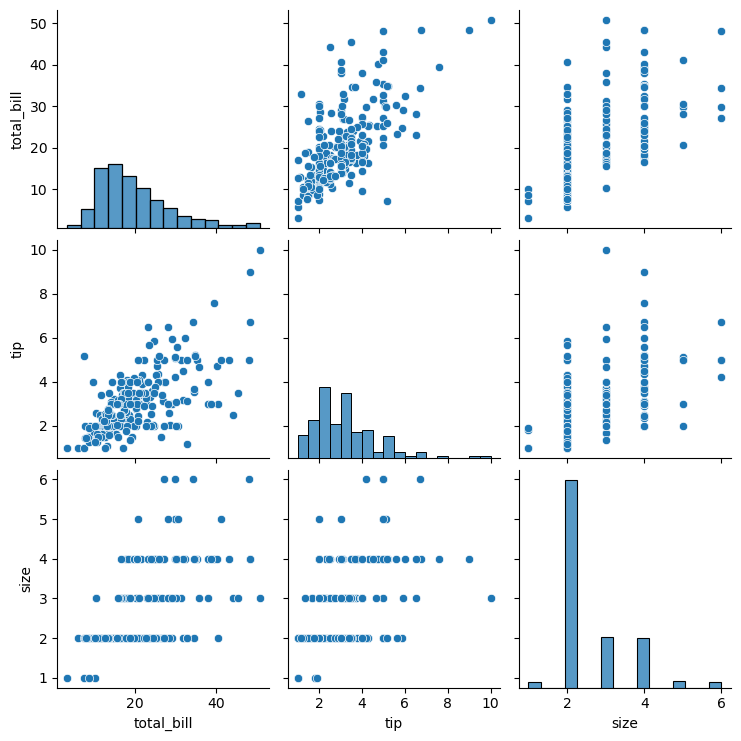

In [18]:
sns.pairplot(tips)

plt.show()

- <u>NOTE:

    - And then when we get to a parameter versus itself for instance size versus size instead of actually plotting a scatterplot the pairplot plots a histogram instead.

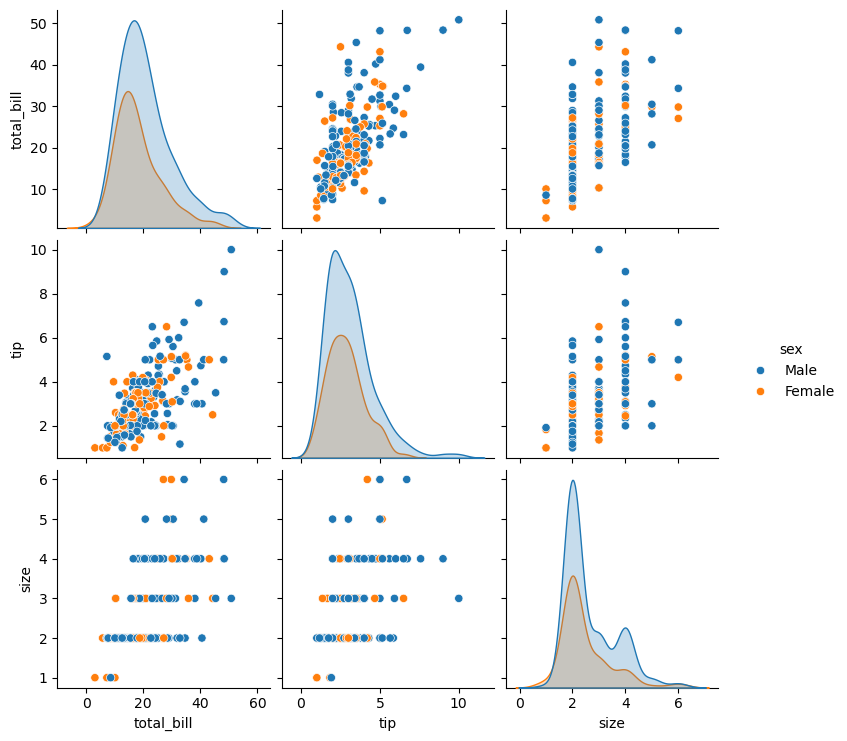

In [19]:
sns.pairplot(tips, hue = 'sex')

plt.show()

- <u>NOTE:

    - When we pass hue equals 'sex', it colors the data points based on the category i.e Male and Female and we get a legend.

***For a third argument we can add palette.***

Essentially there are these color map strings that are from Matplotlib that we can pass in palette argument and they will choose certain colors for whatever the parameters are.

***We're going to discuss palettes and color and style at the very end of the seaborne lecture series.***

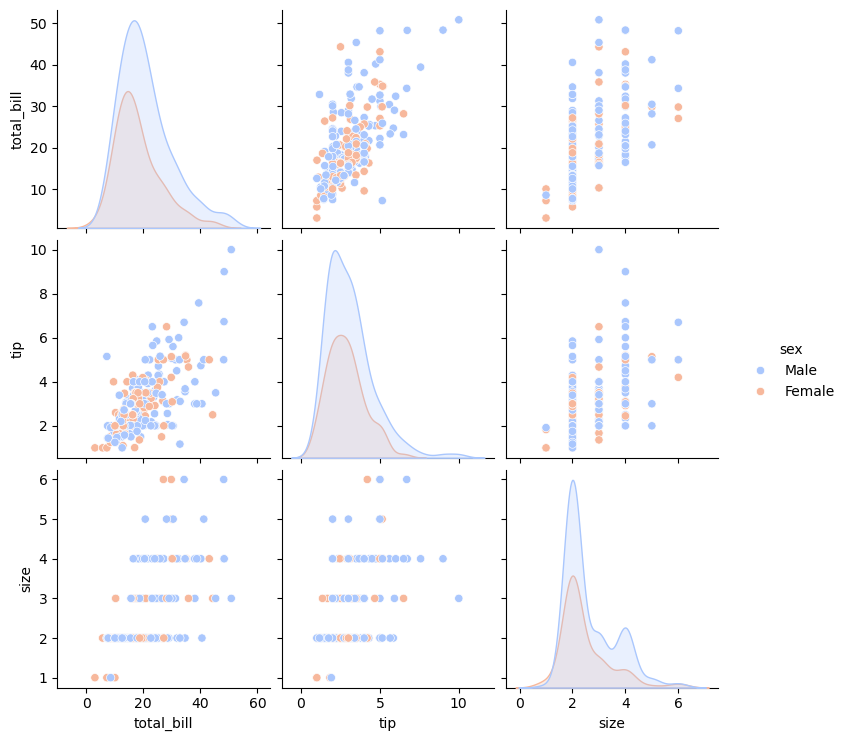

In [20]:
sns.pairplot(tips, hue = 'sex', palette = 'coolwarm')

plt.show()

---

# 4) rugplot

***rugplots are actually a very simple concept, they just draw a dash mark for every data point on a univariate distribution. They are the building block of a KDE plot:***

The difference between a histogram and a rugplot is that the histogram essentially has bins/intervals and it counts the number of data points in each bin and draws a rectangular box for each bin, the height of which corresponds to the number of data points, on the other hand the rugplot just draws dash marks on top of each other representing the number of data points.

- ***Syntax:*** sns.rugplot(indexed_col_name)

                    where;
                        indexed_col_name = indexed column from the DataFrame.

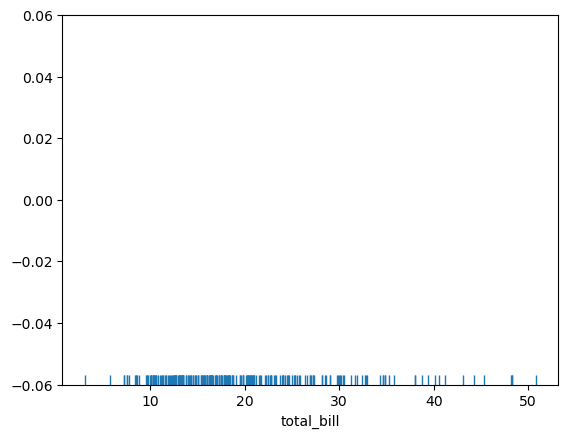

In [21]:
sns.rugplot(tips['total_bill'])

plt.show()

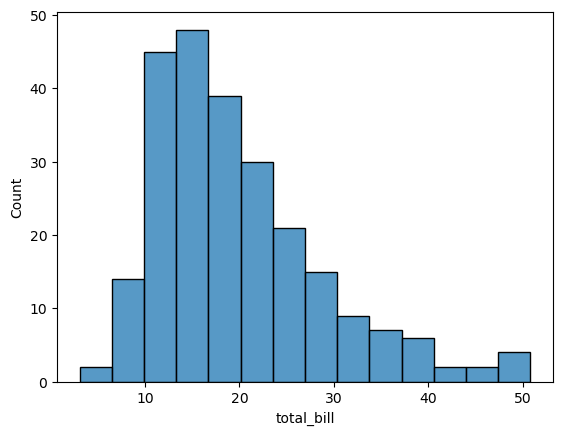

In [22]:
# By default kde = False

sns.histplot(tips['total_bill'])

plt.show()

---

# 5) <u>kdeplot

***kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation(every single dash in the rugplot) with a Gaussian (Normal) distribution centered around that value(the dash). For example:***

For Normal Distribution look at NumPy lecture 18(NumPy Arrays).
The normal curve (bell curve) we’ve seen is nothing but the Probability Density Function (PDF) of a Normal distribution.

***What kdeplot shows:***

    - Instead of showing bars like a histogram, kdeplot estimates the probability density function of the data.
    - Y-axis = density, not counts.
    - Peaks(common values): Where the curve is high, more data points occur around those values.
    - Tails(rare values): Where the curve is low, fewer data points occur.

***Probability density function:*** A Probability Density Function tells us how likely values of a continuous variable are.

    - For contineous variables probabilities come from areas under the curve, not from single points.
    - Properties:
        The PDF is always ≥ 0.
        The area under the **entire** curve = 1 (because total probability = 1).
        The height of the curve at a point does NOT equal probability directly — instead:
            Probability of being between a and b = area under the curve between a and b.
    
    - Discrete Variable: Takes countable, distinct values (Ex: Number of customers = {0, 1, 2, 3, …})
    - For discrete variables, we use probability mass function (PMF).
    - PMF Example: Rolling a fair die 🎲 
        Possible outcomes: {1, 2, 3, 4, 5, 6}
        Each outcome has probability: 1/6
        PMF is usually shown as a bar chart.
        X-axis = values (discrete outcomes)
        Y-axis = probability of each value
    - Continuous Variable: Takes any value in a range, including fractions/decimals (Ex: Height = 170.2 cm, 170.25 cm, …)

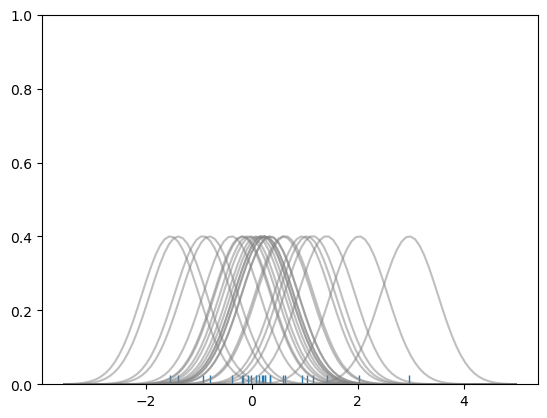

In [23]:
# Don't worry about understanding this code!
# It's just for the diagram below.

# Imports.
import numpy as np
# import matplotlib.pyplot as plt (already run)
from scipy import stats

# Create dataset.
dataset = np.random.randn(25) # 1-D array, shape(25,)

# Create another rugplot.
sns.rugplot(dataset)

# Set up the x-axis for the plot.
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min, x_max, 100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis, kernel, color = 'grey', alpha=0.5)

plt.ylim(0, 1)

plt.show()

### To get the kde plot we can sum these basis functions(sum of every Normal curve)

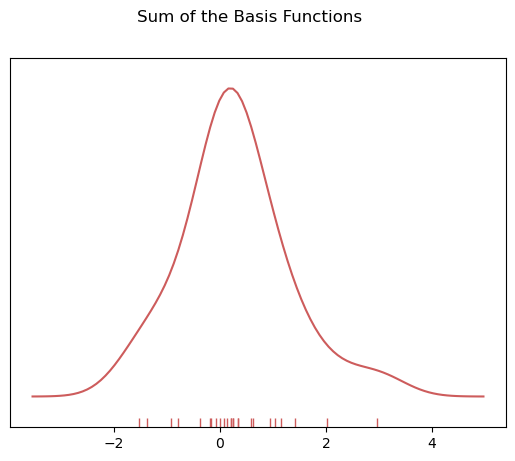

In [24]:
# Don't worry about understanding this code!
# It's just for the diagram below.

# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list, axis=0)

# Plot figure
fig = plt.plot(x_axis, sum_of_kde, color='indianred')

# Add the initial rugplot
sns.rugplot(dataset, c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

plt.show()

### We know we can get kde plots from histplot, by setting kde argument = True.

### But if we just want the kde plot we can use sns.kdeplot()

***Syntax: sns.kdeplot(indexed_col_name)***

                    where;
                        col_name = indexed column from the DataFrame.                    

So with our tips dataset:

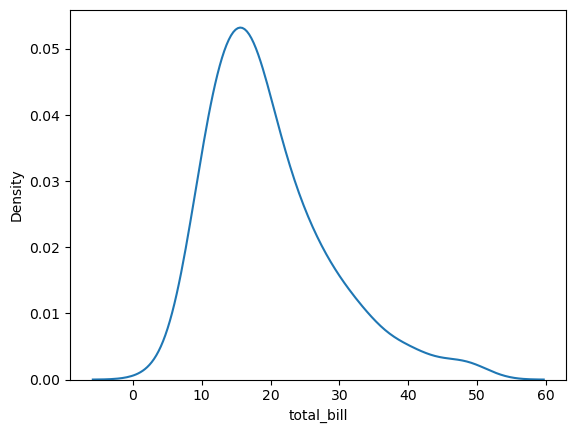

In [25]:
sns.kdeplot(tips['total_bill'])

plt.show()

- <u>NOTE:

    - A tall peak around 10–20 would mean many customers had total bills in that range.
    - A smaller tail going toward 50+ means fewer customers had very high bills.
    - It’s basically answering:

          “If I randomly pick a bill, how likely is it to fall in this range?”

- Hopefully we realize that Seaborn is incredibly powerful and also very simple as far as the code we need to write.

- Everything we did was just done in one line.

- If we try to do this in Matplotlib it would have taken us multiple lines but what's nice about this is that it works off of what we know about Matplotlib and we'll see that a lot more when we talk about styling and colors.

- A lot of that Matplotlib knowledge is going to be transferrable to actually editing little things in these plots.

---